Dataset preview:


,ds,y
0,2021-01-01,200
1,2021-02-01,240
2,2021-03-01,300
3,2021-04-01,350
4,2021-05-01,400



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      15 non-null     datetime64[ns]
 1   y       15 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 372.0 bytes
None

Missing values:
 ds    0
y     0
dtype: int64


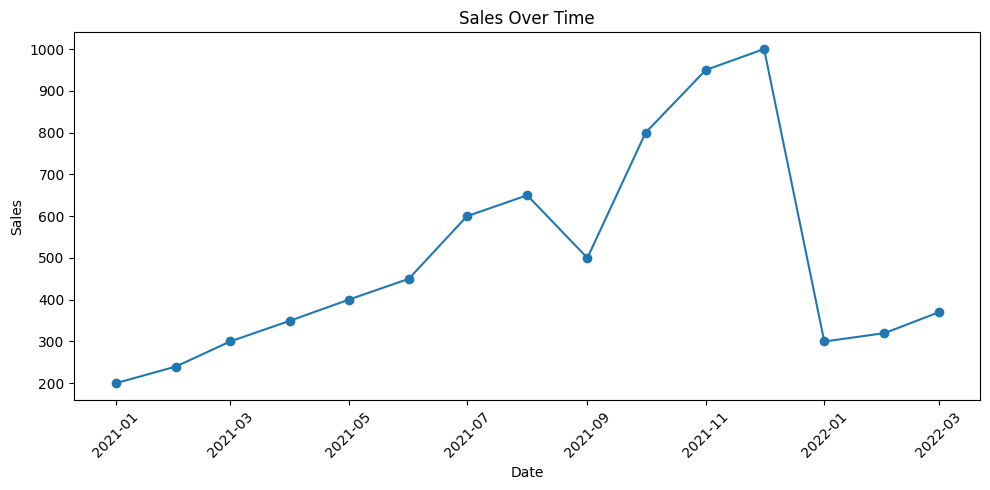

C:\Users\acer\AppData\Local\Temp\ipykernel_8308\894831761.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M', on='ds').sum()


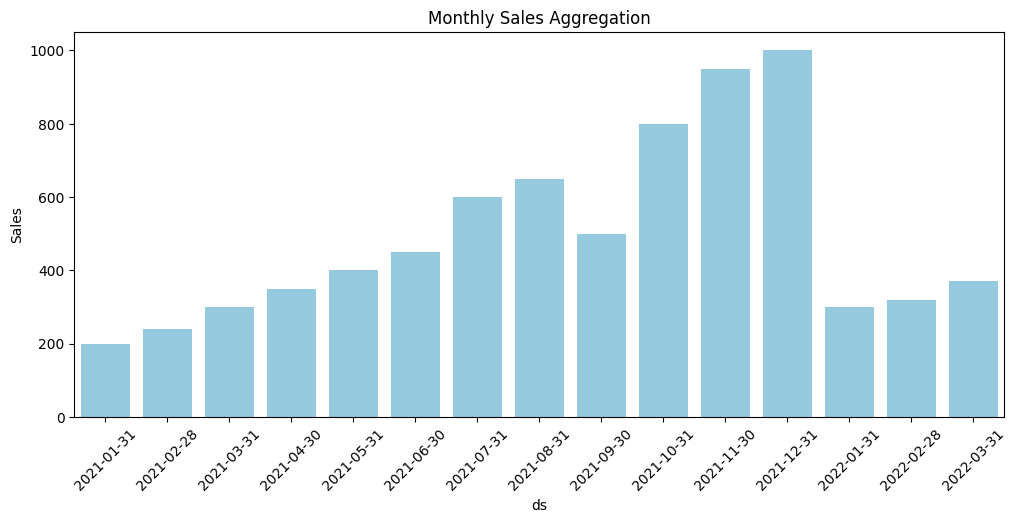

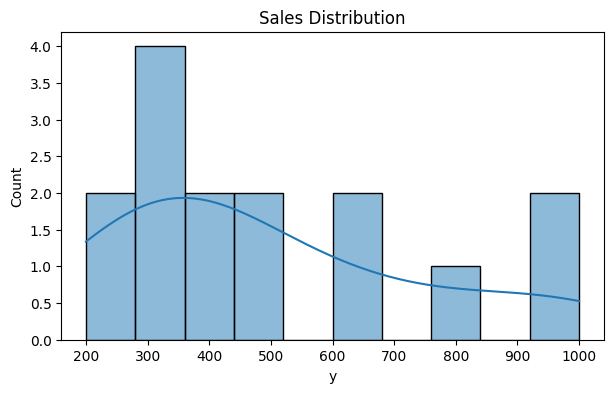

ValueError: x must have 2 complete cycles requires 24 observations. x only has 15 observation(s)

In [1]:
# eda.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
df = pd.read_csv("../data/sample_sales.csv", parse_dates=['ds'])

# 🔍 Preview
print("Dataset preview:")
display(df.head())
print("\nDataset info:")
print(df.info())

# ✅ Check missing values
print("\nMissing values:\n", df.isnull().sum())

# 📊 Sales over time
plt.figure(figsize=(10,5))
plt.plot(df['ds'], df['y'], marker='o')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📈 Monthly aggregation
monthly = df.resample('M', on='ds').sum()
plt.figure(figsize=(12,5))
sns.barplot(x=monthly.index, y=monthly['y'], color="skyblue")
plt.title("Monthly Sales Aggregation")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

# 📦 Distribution of sales
plt.figure(figsize=(7,4))
sns.histplot(df['y'], kde=True, bins=10)
plt.title("Sales Distribution")
plt.show()

# 🌀 Seasonal decomposition
result = seasonal_decompose(df.set_index('ds')['y'], model='multiplicative', period=12)
result.plot()
plt.show()
